In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "emilia-romagna"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,8,Emilia-Romagna,15,2,17,9,26,8,8,...,0.0,243.0,0.0,3.0,11.76,65.38,3.29,0.00,0.00,44.444
1,2020-02-26T18:00:00,8,Emilia-Romagna,20,3,23,23,46,20,21,...,1.0,186.0,0.0,14.0,13.04,50.00,11.29,0.00,50.00,80.769
2,2020-02-27T18:00:00,8,Emilia-Romagna,36,6,42,54,96,50,50,...,0.0,456.0,0.0,31.0,14.29,43.75,10.96,0.00,100.00,108.696
3,2020-02-28T18:00:00,8,Emilia-Romagna,56,6,62,81,143,47,48,...,1.0,244.0,0.0,27.0,9.68,43.36,19.67,0.00,0.00,50.000
4,2020-02-29T17:00:00,8,Emilia-Romagna,86,11,97,116,213,70,72,...,2.0,273.0,0.0,35.0,11.34,45.54,26.37,0.00,83.33,50.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2020-11-18T17:00:00,8,Emilia-Romagna,2449,244,2693,56626,59319,2051,2371,...,53.0,20732.0,7270.0,2056.0,9.06,4.54,11.44,32.61,-1.21,4.140
268,2020-11-19T17:00:00,8,Emilia-Romagna,2489,244,2733,58276,61009,1690,2160,...,50.0,18930.0,7937.0,1650.0,8.93,4.48,11.41,27.21,0.00,3.641
269,2020-11-20T17:00:00,8,Emilia-Romagna,2534,244,2778,60156,62934,1925,2533,...,47.0,22307.0,8449.0,1880.0,8.78,4.41,11.36,29.98,0.00,4.152
270,2020-11-21T17:00:00,8,Emilia-Romagna,2594,241,2835,62245,65080,2146,2723,...,47.0,19697.0,7971.0,2089.0,8.50,4.36,13.82,34.16,-1.23,4.327


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 22, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2665
Nuovi tamponi: 13114.0
Percentuale nuovi positivi/nuovi tamponi: 20.0 %
Nuovi guariti: 433.0
Nuovi deceduti: 38.0
Variazione positivi ricoverati con sintomi: 72.0
Variazione positivi in terapia intensiva: 8.0
Variazione positivi in isolamento dimiciliare: 2114.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 22, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-23T17:00:00,8,Emilia-Romagna,187,20,207,4406,4613,-20,101,...,1.0,10061.0,5350.0,-20.0,9.66,4.49,1.00,1.89,-9.09,2.180
1,2020-09-24T17:00:00,8,Emilia-Romagna,192,20,212,4415,4627,14,99,...,1.0,11096.0,6414.0,9.0,9.43,4.58,0.89,1.54,0.00,2.146
2,2020-09-25T17:00:00,8,Emilia-Romagna,189,18,207,4444,4651,24,122,...,1.0,10040.0,4122.0,29.0,8.70,4.45,1.22,2.96,-10.00,2.637
3,2020-09-26T17:00:00,8,Emilia-Romagna,200,17,217,4500,4717,66,99,...,0.0,10107.0,4748.0,56.0,7.83,4.60,0.98,2.09,-5.56,2.129
4,2020-09-27T17:00:00,8,Emilia-Romagna,201,15,216,4466,4682,-35,96,...,1.0,9295.0,3737.0,-34.0,6.94,4.61,1.03,2.57,-11.76,2.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-18T17:00:00,8,Emilia-Romagna,2449,244,2693,56626,59319,2051,2371,...,53.0,20732.0,7270.0,2056.0,9.06,4.54,11.44,32.61,-1.21,4.140
57,2020-11-19T17:00:00,8,Emilia-Romagna,2489,244,2733,58276,61009,1690,2160,...,50.0,18930.0,7937.0,1650.0,8.93,4.48,11.41,27.21,0.00,3.641
58,2020-11-20T17:00:00,8,Emilia-Romagna,2534,244,2778,60156,62934,1925,2533,...,47.0,22307.0,8449.0,1880.0,8.78,4.41,11.36,29.98,0.00,4.152
59,2020-11-21T17:00:00,8,Emilia-Romagna,2594,241,2835,62245,65080,2146,2723,...,47.0,19697.0,7971.0,2089.0,8.50,4.36,13.82,34.16,-1.23,4.327


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

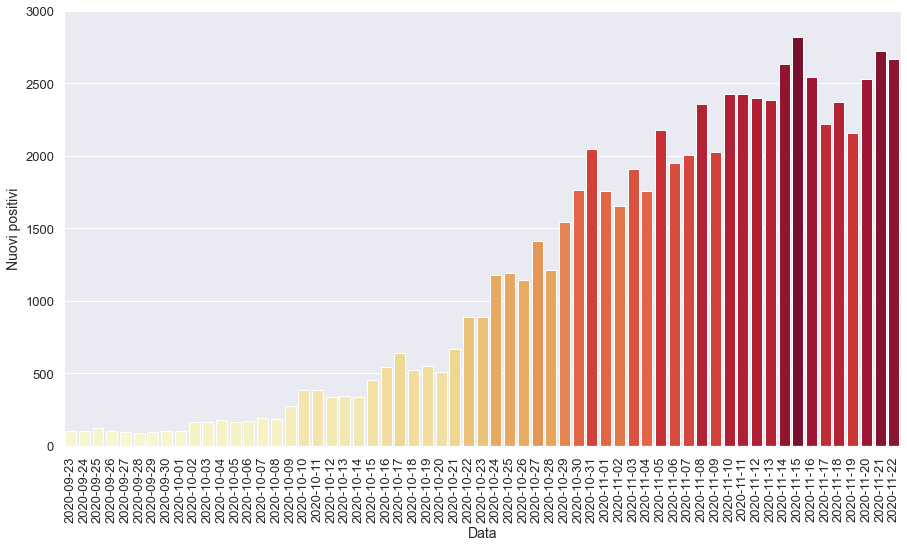

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

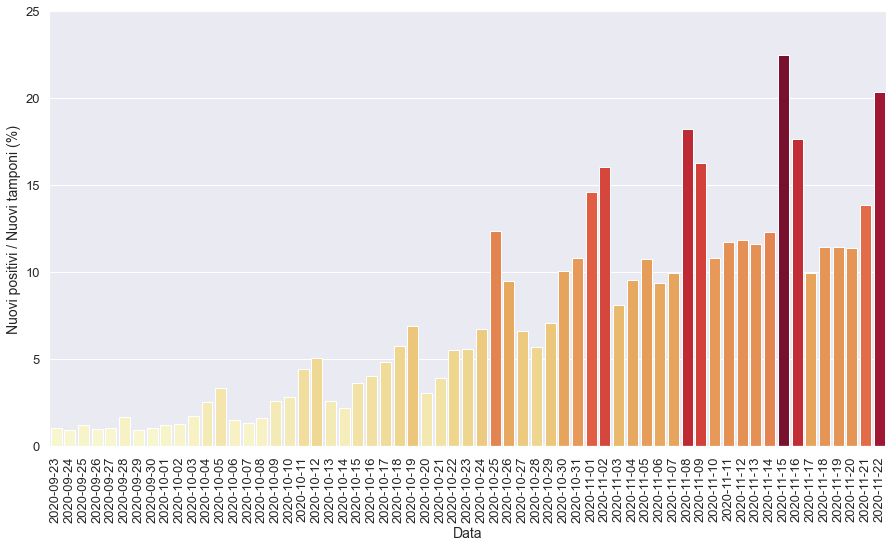

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

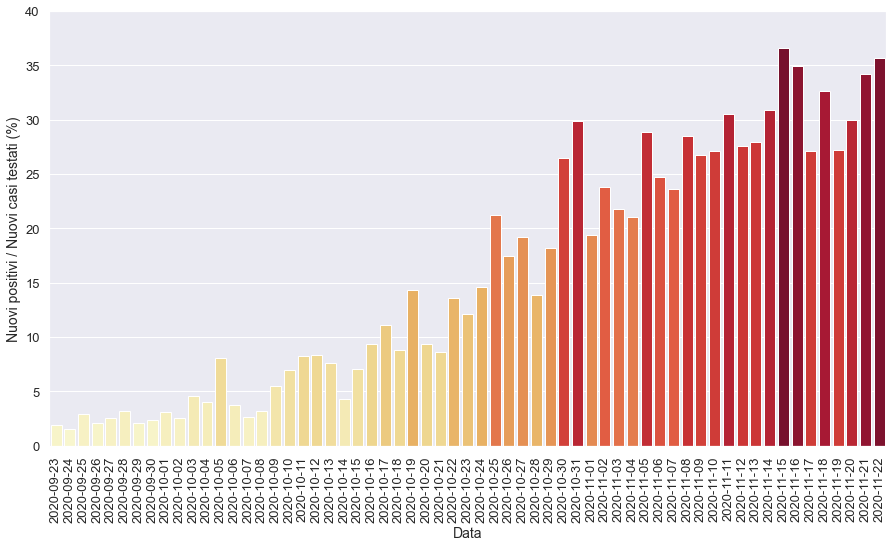

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

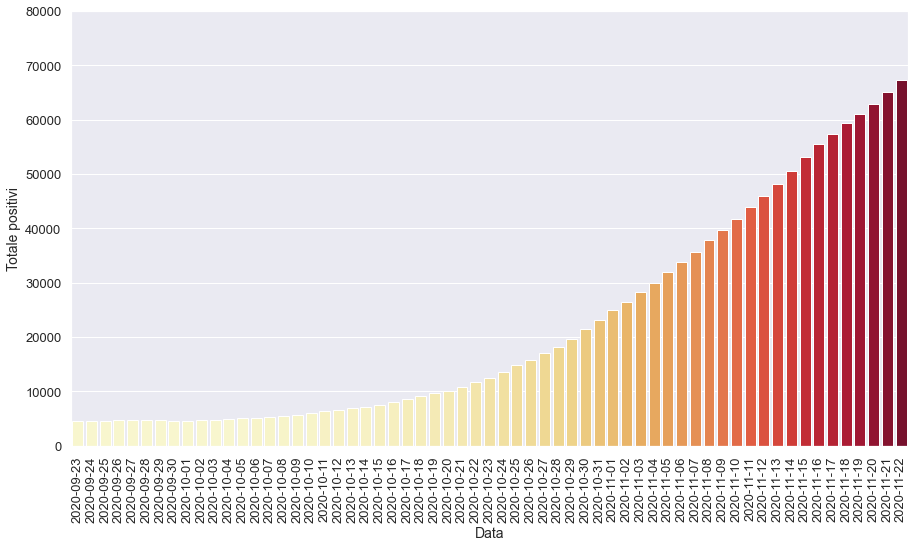

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

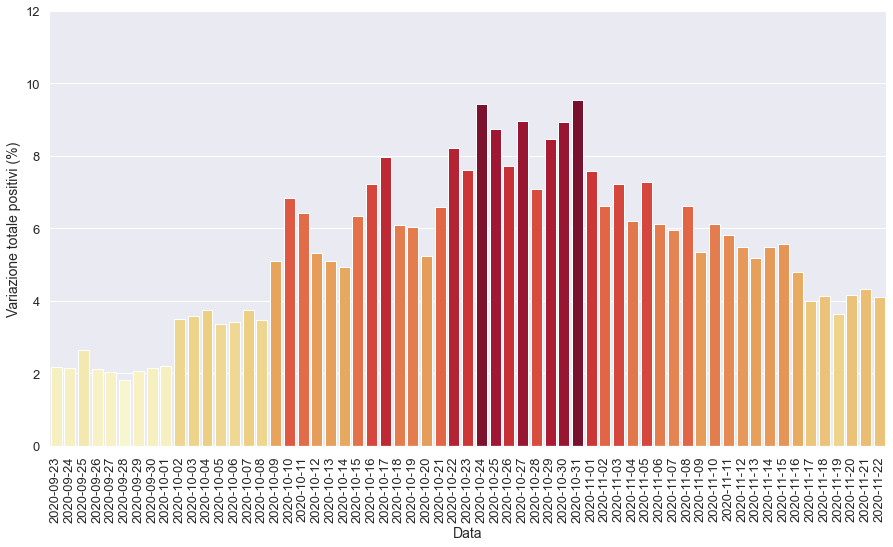

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

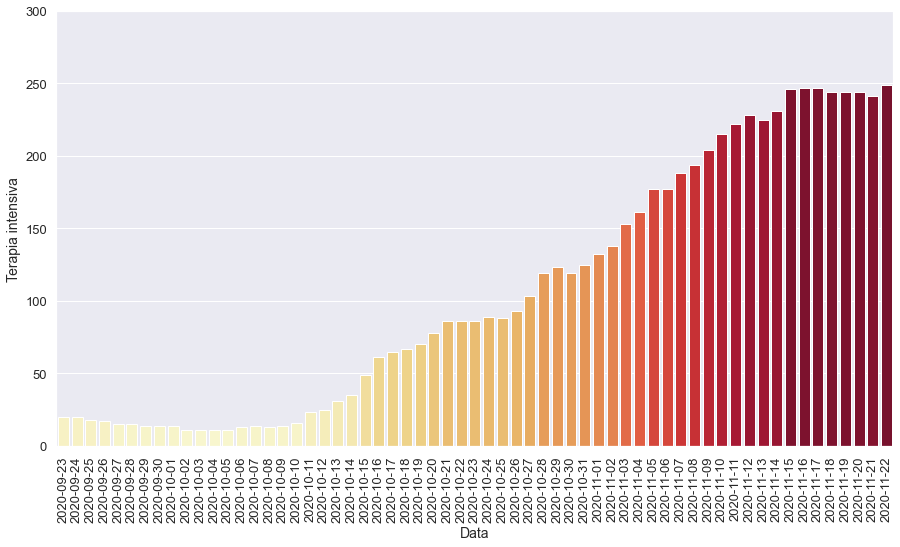

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

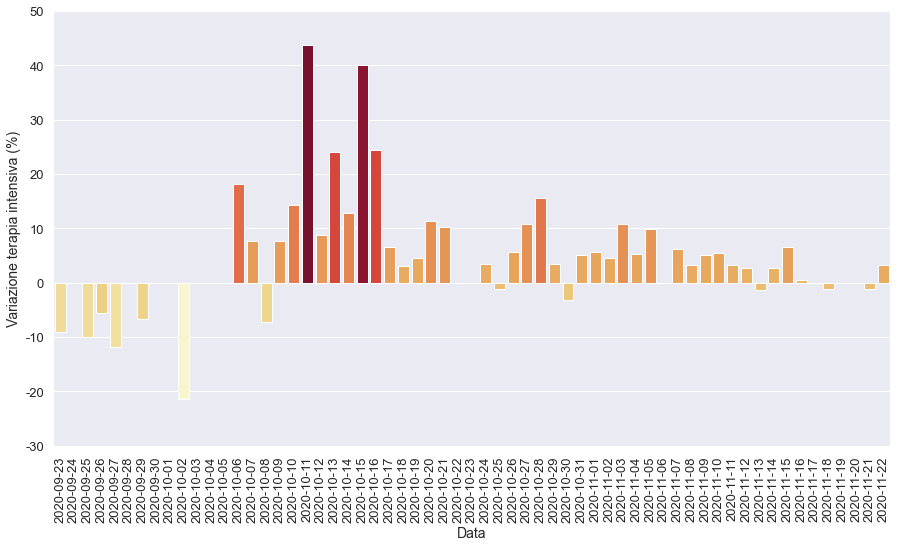

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

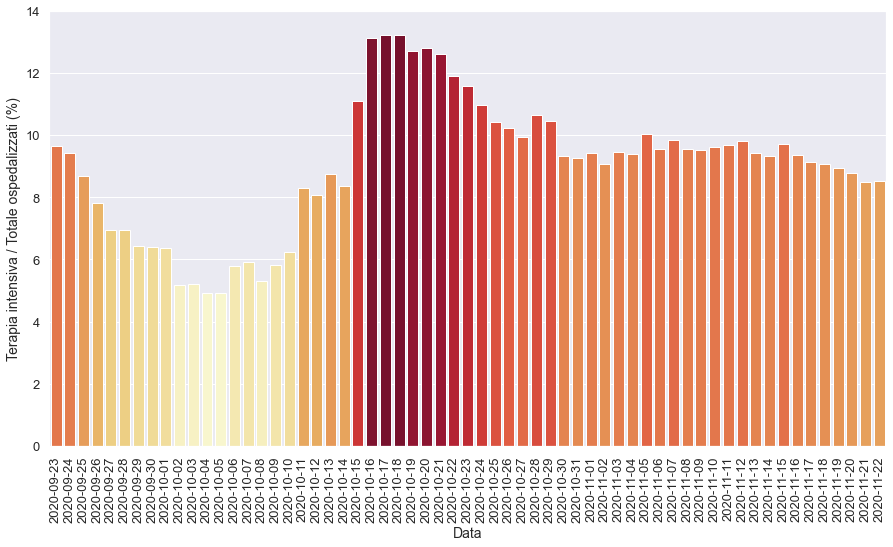

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

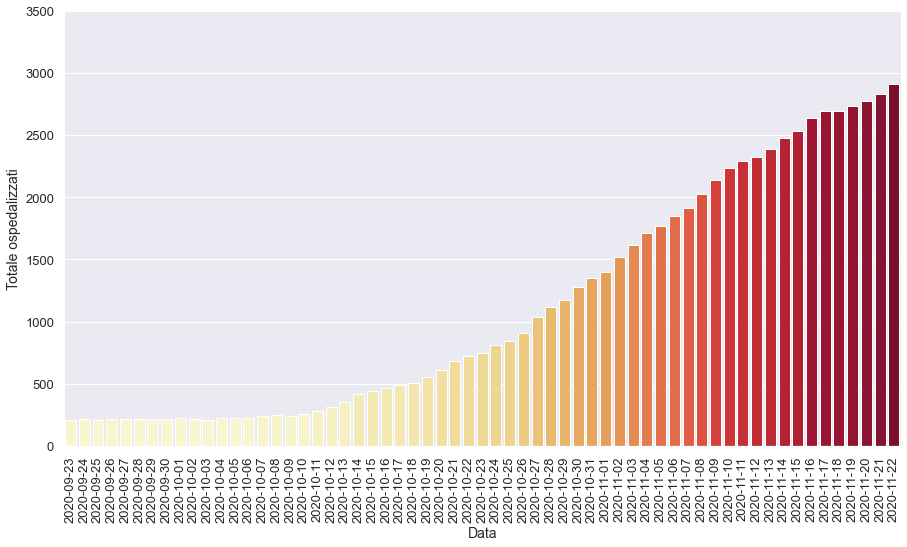

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

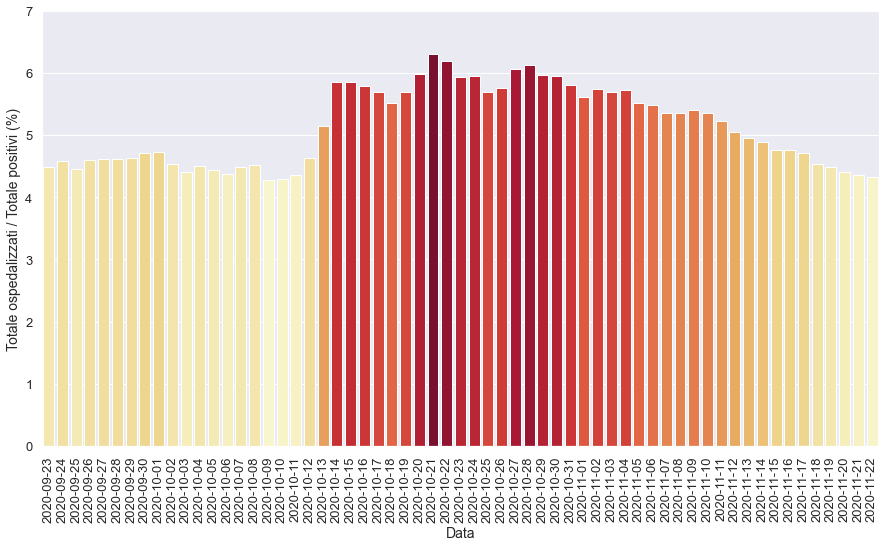

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

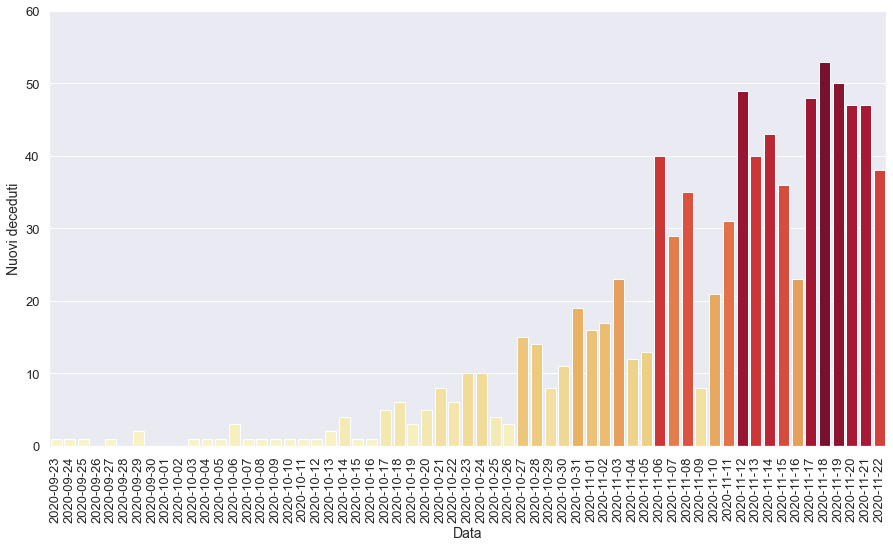

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

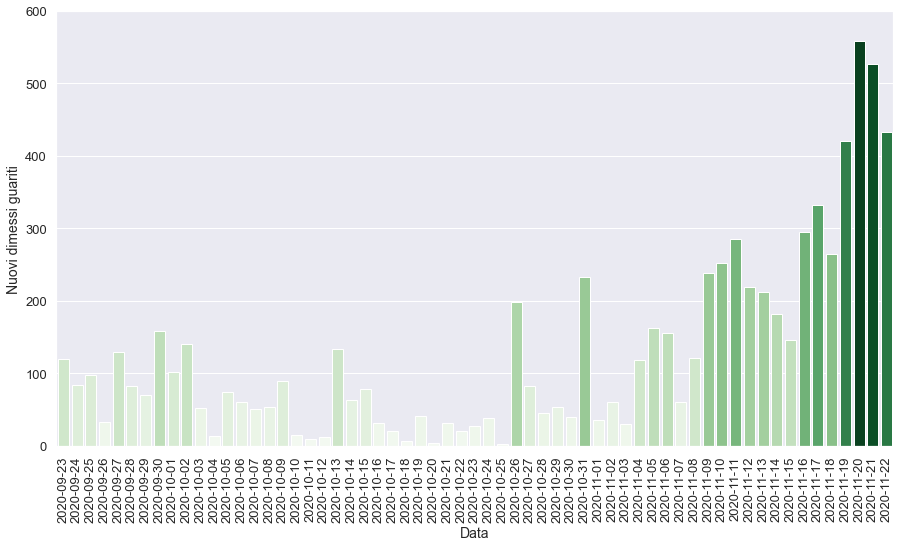

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-23T17:00:00,8,Emilia-Romagna,657,86,743,11771,12514,851,888,...,10.0,15978.0,7308.0,830.0,11.57,5.94,5.56,12.15,0.00,7.614
1,2020-10-24T17:00:00,8,Emilia-Romagna,723,89,812,12830,13642,1128,1180,...,10.0,17612.0,8085.0,1059.0,10.96,5.95,6.70,14.59,3.49,9.432
2,2020-10-25T17:00:00,8,Emilia-Romagna,757,88,845,13983,14828,1186,1192,...,4.0,9644.0,5605.0,1153.0,10.41,5.70,12.36,21.27,-1.12,8.738
3,2020-10-26T17:00:00,8,Emilia-Romagna,816,93,909,14860,15769,941,1146,...,3.0,12083.0,6570.0,877.0,10.23,5.76,9.48,17.44,5.68,7.730
4,2020-10-27T17:00:00,8,Emilia-Romagna,934,103,1037,16043,17080,1311,1413,...,15.0,21401.0,7366.0,1183.0,9.93,6.07,6.60,19.18,10.75,8.963
5,2020-10-28T17:00:00,8,Emilia-Romagna,999,119,1118,17112,18230,1150,1212,...,14.0,21376.0,8739.0,1069.0,10.64,6.13,5.67,13.87,15.53,7.097
6,2020-10-29T17:00:00,8,Emilia-Romagna,1054,123,1177,18536,19713,1483,1545,...,8.0,21860.0,8476.0,1424.0,10.45,5.97,7.07,18.23,3.36,8.476
7,2020-10-30T17:00:00,8,Emilia-Romagna,1157,119,1276,20145,21421,1708,1763,...,11.0,17577.0,6653.0,1609.0,9.33,5.96,10.03,26.50,-3.25,8.945
8,2020-10-31T17:00:00,8,Emilia-Romagna,1223,125,1348,21865,23213,1792,2046,...,19.0,18943.0,6852.0,1720.0,9.27,5.81,10.80,29.86,5.04,9.552
9,2020-11-01T17:00:00,8,Emilia-Romagna,1267,132,1399,23518,24917,1704,1758,...,16.0,12039.0,9050.0,1653.0,9.44,5.61,14.60,19.43,5.60,7.574


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

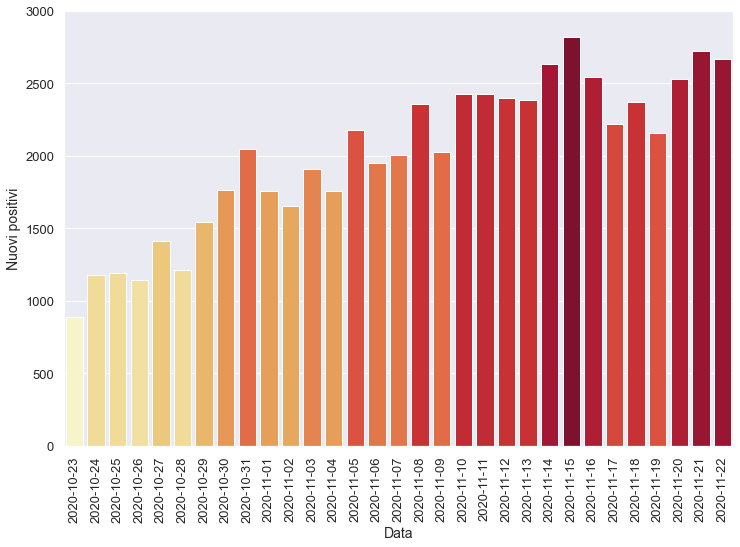

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

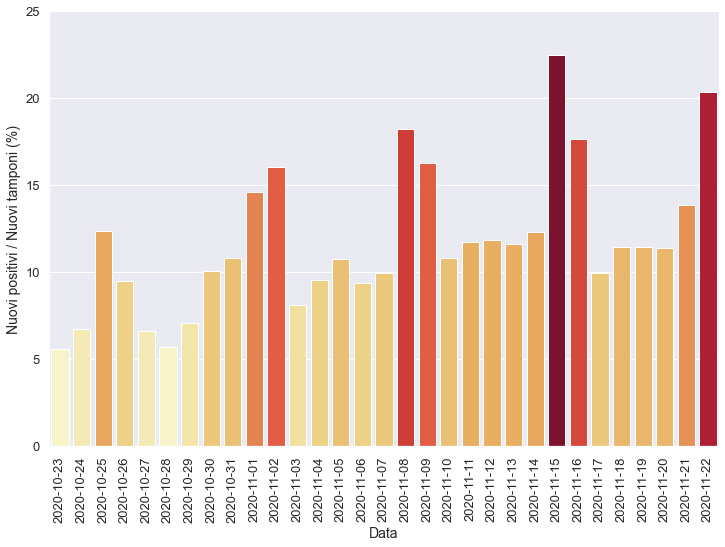

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

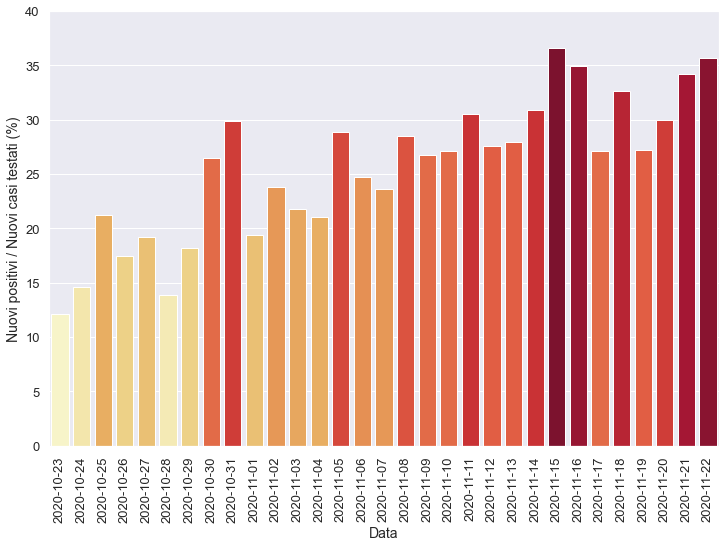

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

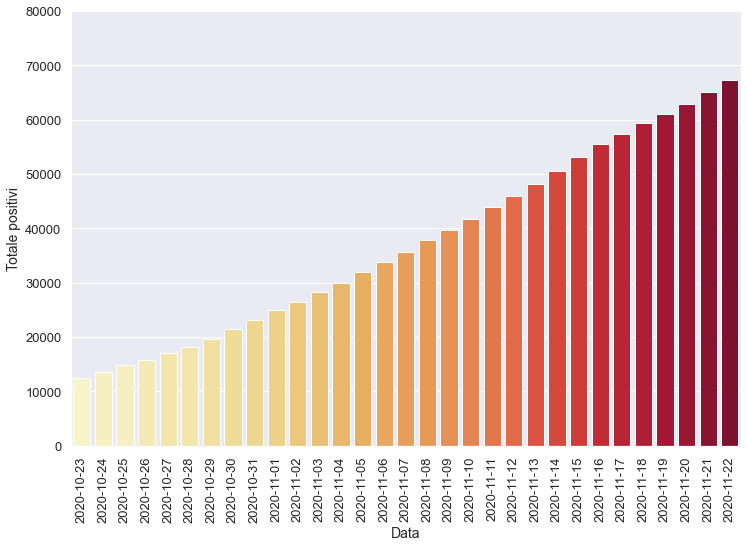

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

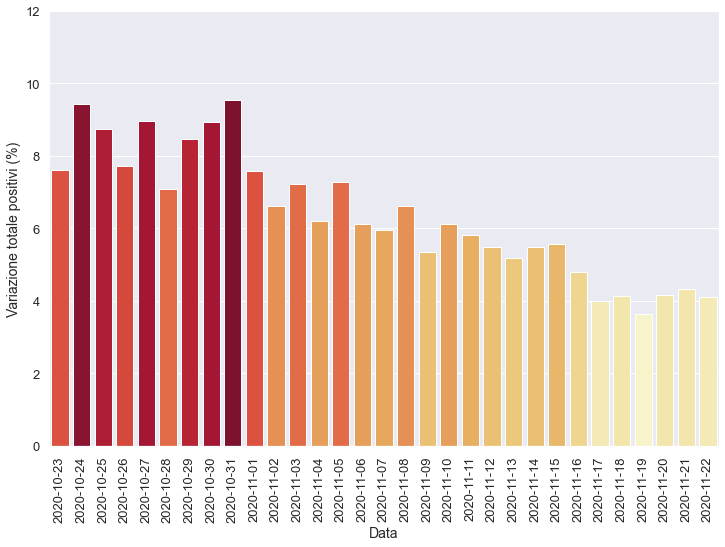

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

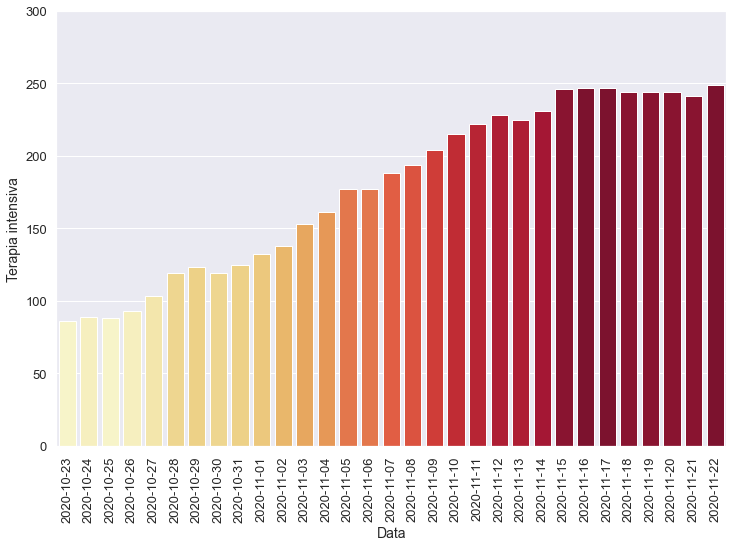

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

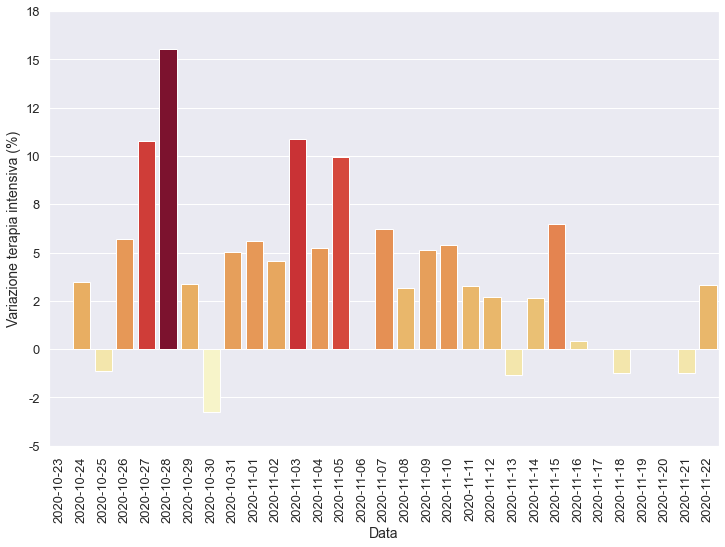

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

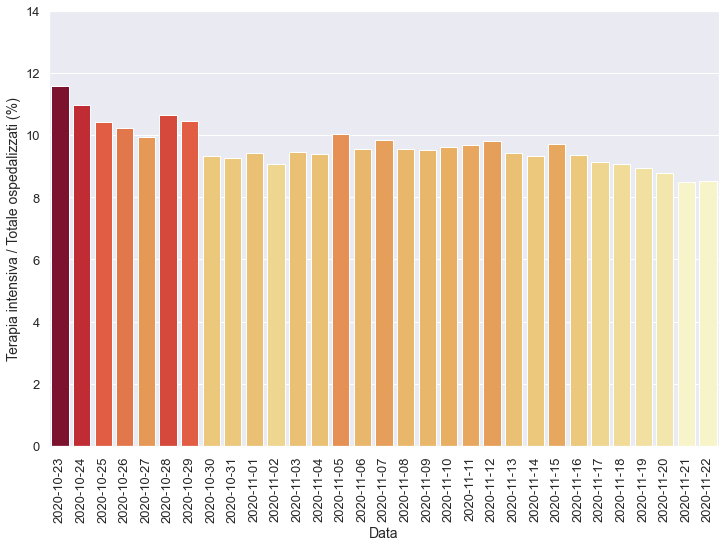

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

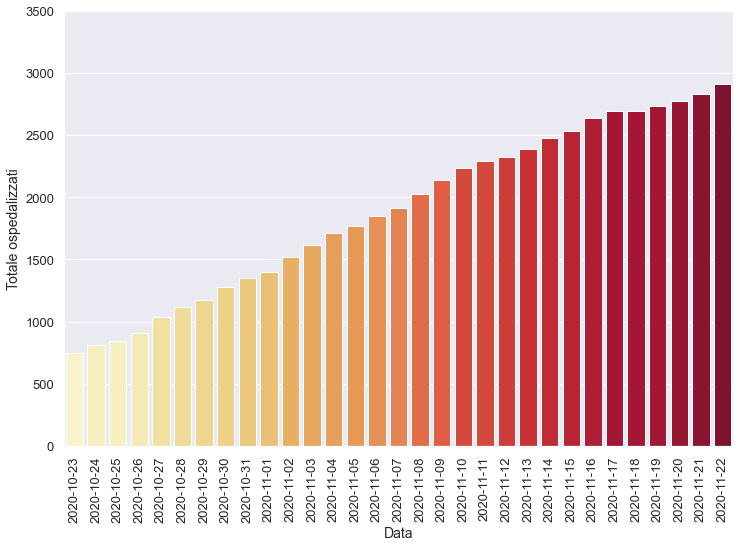

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

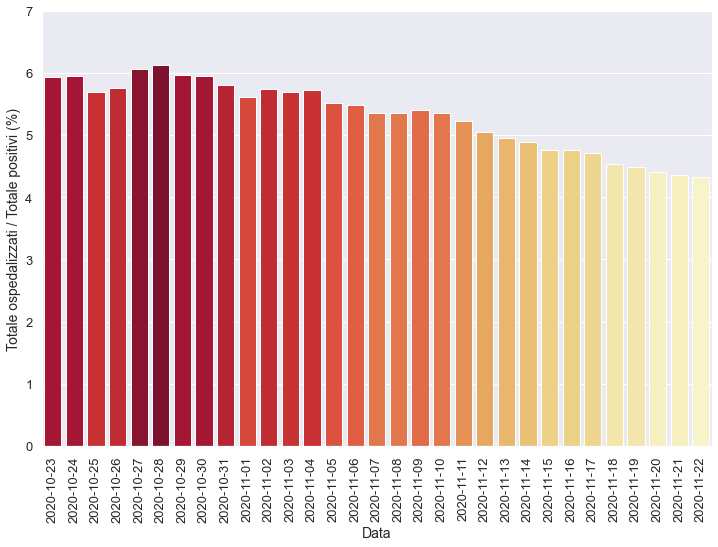

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

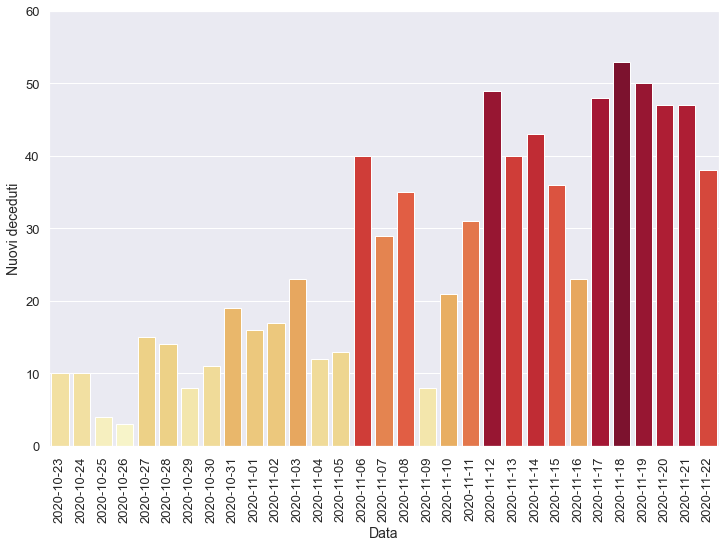

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

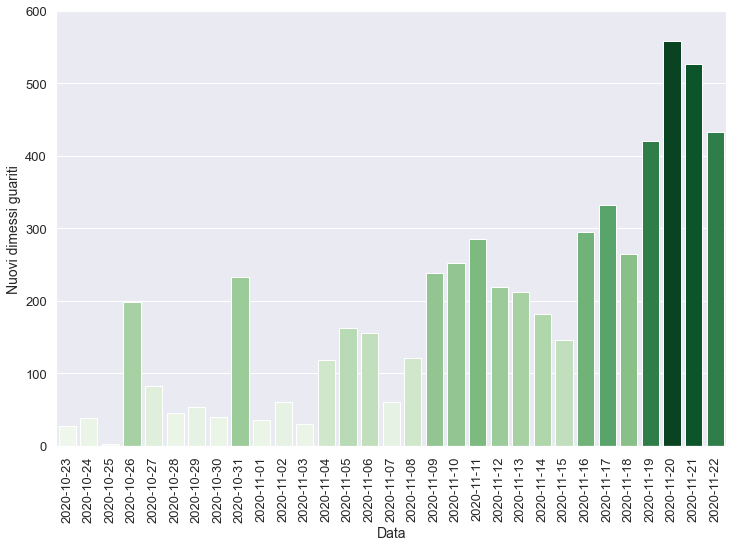

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-15T17:00:00,8,Emilia-Romagna,2285,246,2531,50670,53201,2639,2822,...,36.0,12562.0,7719.0,2582.0,9.72,4.76,22.46,36.56,6.49,5.581
1,2020-11-16T17:00:00,8,Emilia-Romagna,2393,247,2640,52789,55429,2228,2547,...,23.0,14442.0,7287.0,2119.0,9.36,4.76,17.64,34.95,0.41,4.788
2,2020-11-17T17:00:00,8,Emilia-Romagna,2451,247,2698,54570,57268,1839,2219,...,48.0,22381.0,8196.0,1781.0,9.15,4.71,9.91,27.07,0.00,4.003
3,2020-11-18T17:00:00,8,Emilia-Romagna,2449,244,2693,56626,59319,2051,2371,...,53.0,20732.0,7270.0,2056.0,9.06,4.54,11.44,32.61,-1.21,4.140
4,2020-11-19T17:00:00,8,Emilia-Romagna,2489,244,2733,58276,61009,1690,2160,...,50.0,18930.0,7937.0,1650.0,8.93,4.48,11.41,27.21,0.00,3.641
5,2020-11-20T17:00:00,8,Emilia-Romagna,2534,244,2778,60156,62934,1925,2533,...,47.0,22307.0,8449.0,1880.0,8.78,4.41,11.36,29.98,0.00,4.152
6,2020-11-21T17:00:00,8,Emilia-Romagna,2594,241,2835,62245,65080,2146,2723,...,47.0,19697.0,7971.0,2089.0,8.50,4.36,13.82,34.16,-1.23,4.327
7,2020-11-22T17:00:00,8,Emilia-Romagna,2666,249,2915,64359,67274,2194,2665,...,38.0,13114.0,7468.0,2114.0,8.54,4.33,20.32,35.69,3.32,4.095


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

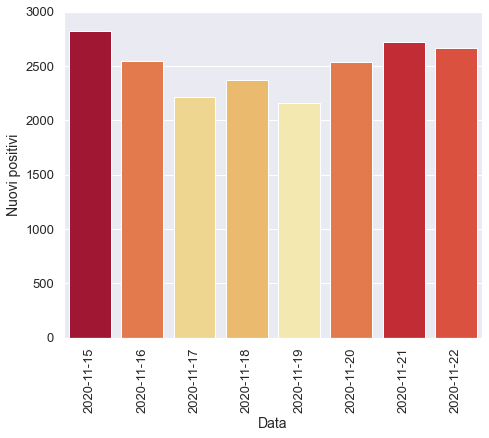

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

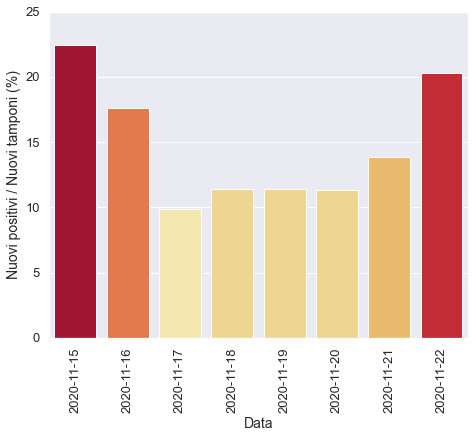

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

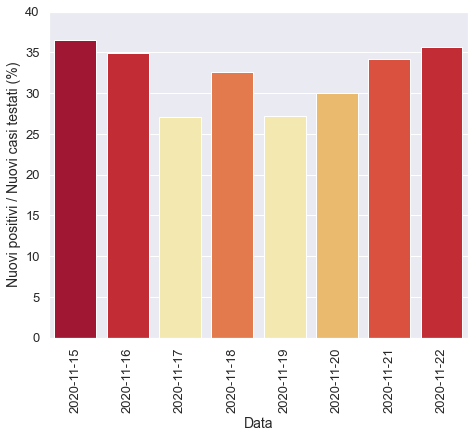

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

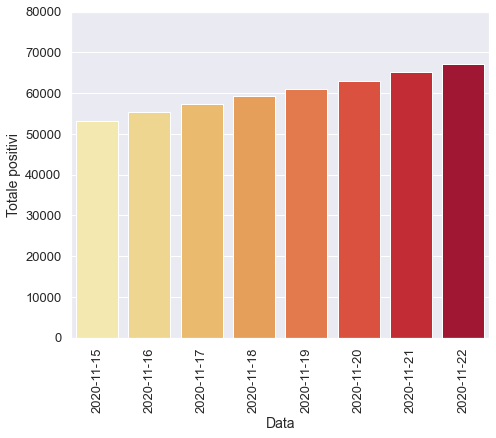

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

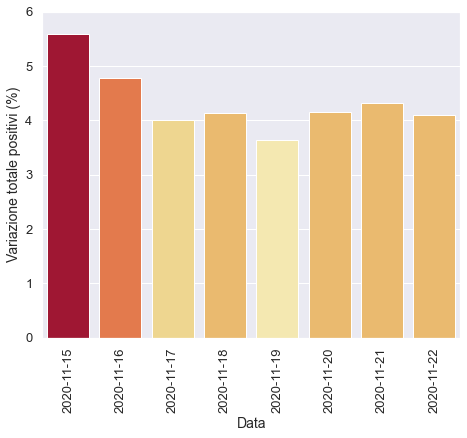

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

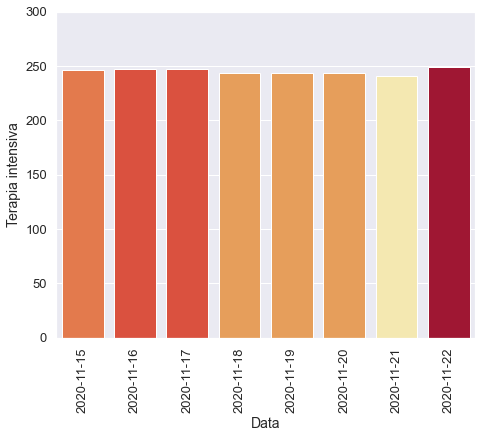

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

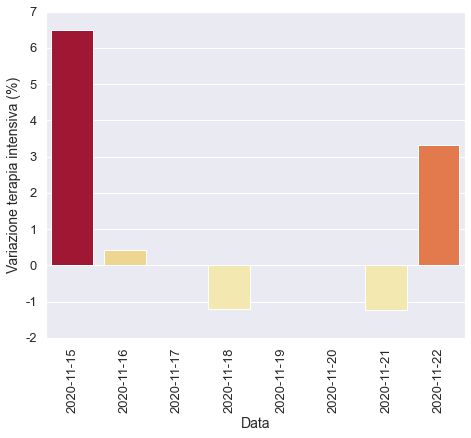

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

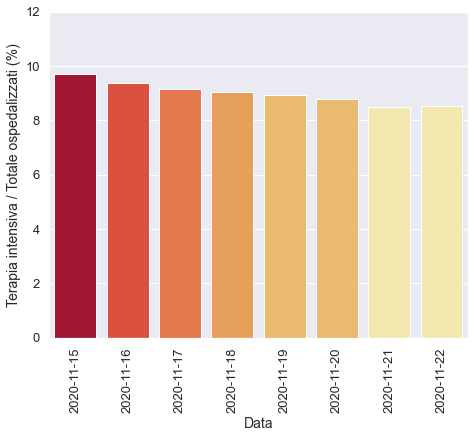

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

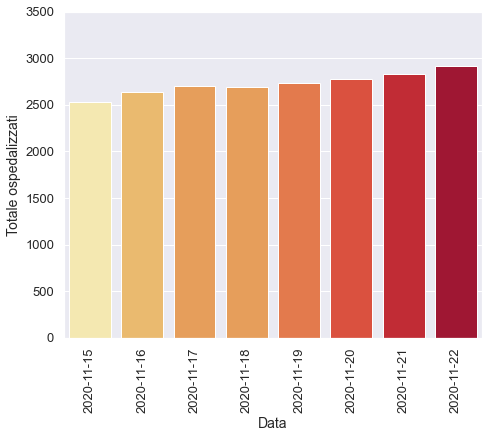

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

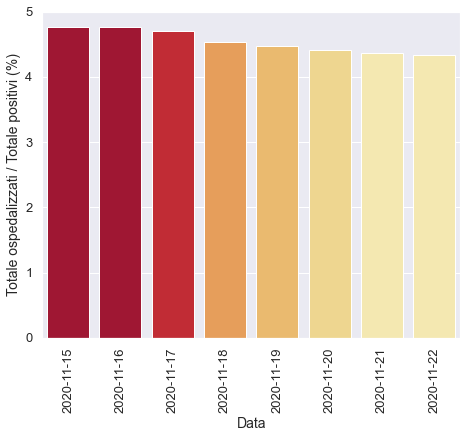

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

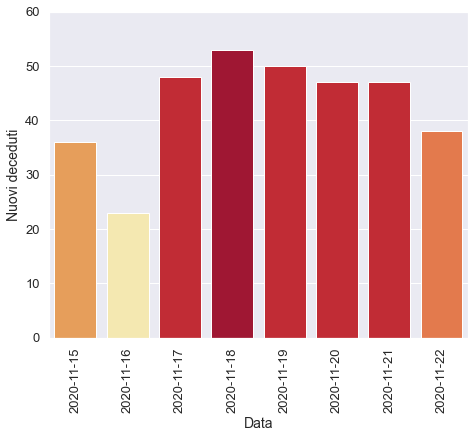

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

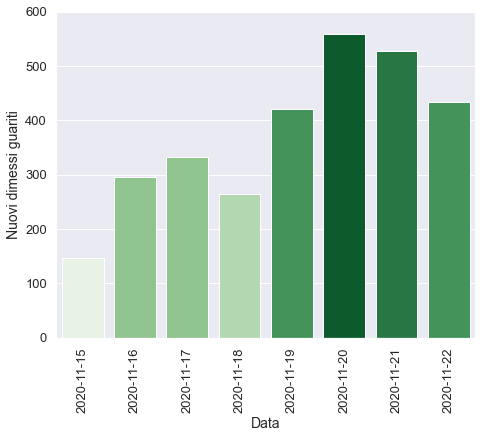

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)